In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Goal of this code:
1. Import TCM data
2. Visualize raw data
3. Burst average raw data
4. Clean up raw data
5. Re-visualize raw data

In [2]:
data = pd.read_csv('Log2_GMS_Oct_(0)_CR.txt',header=0)

In [3]:
data

,ISO 8601 Time,Speed (cm/s),Bearing (degrees),Velocity-N (cm/s),Velocity-E (cm/s)
0,2020-09-25T10:00:00.000,41.86,126.87,-25.12,33.49
1,2020-09-25T10:00:00.063,42.05,124.86,-24.04,34.51
2,2020-09-25T10:00:00.125,41.68,126.58,-24.84,33.47
3,2020-09-25T10:00:00.188,42.24,123.77,-23.48,35.11
4,2020-09-25T10:00:00.250,41.86,126.14,-24.69,33.81
...,...,...,...,...,...
8985115,2020-10-21T09:56:29.688,69.20,93.91,-4.72,69.04
8985116,2020-10-21T09:56:29.750,69.20,93.02,-3.65,69.10
8985117,2020-10-21T09:56:29.813,69.20,92.94,-3.55,69.11
8985118,2020-10-21T09:56:29.875,69.40,95.11,-6.18,69.12


In [4]:
data['DateTime'] = pd.to_datetime(data['ISO 8601 Time'])
data

,ISO 8601 Time,Speed (cm/s),Bearing (degrees),Velocity-N (cm/s),Velocity-E (cm/s),DateTime
0,2020-09-25T10:00:00.000,41.86,126.87,-25.12,33.49,2020-09-25 10:00:00.000
1,2020-09-25T10:00:00.063,42.05,124.86,-24.04,34.51,2020-09-25 10:00:00.063
2,2020-09-25T10:00:00.125,41.68,126.58,-24.84,33.47,2020-09-25 10:00:00.125
3,2020-09-25T10:00:00.188,42.24,123.77,-23.48,35.11,2020-09-25 10:00:00.188
4,2020-09-25T10:00:00.250,41.86,126.14,-24.69,33.81,2020-09-25 10:00:00.250
...,...,...,...,...,...,...
8985115,2020-10-21T09:56:29.688,69.20,93.91,-4.72,69.04,2020-10-21 09:56:29.688
8985116,2020-10-21T09:56:29.750,69.20,93.02,-3.65,69.10,2020-10-21 09:56:29.750
8985117,2020-10-21T09:56:29.813,69.20,92.94,-3.55,69.11,2020-10-21 09:56:29.813
8985118,2020-10-21T09:56:29.875,69.40,95.11,-6.18,69.12,2020-10-21 09:56:29.875


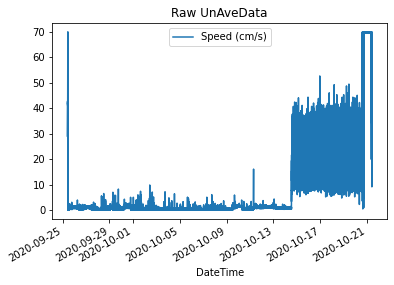

In [5]:
data.plot(x='DateTime',y='Speed (cm/s)',title='Raw UnAveData')

In [6]:
#option 1 - set date-time column as INDEX for dataframe instead of a column
data2 = data.set_index('DateTime')
#how many columns are there in data2? How can you check column names?

In [7]:
#now let's remove pre-deployment & post-deployment
data2s = data2['2020-09-25 11:00:00':'2020-10-20 12:00:00']

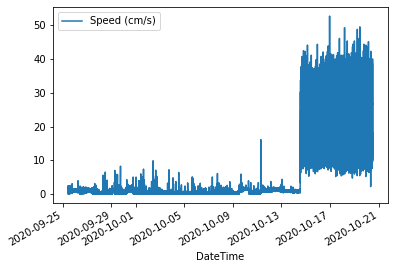

In [8]:
data2s.plot(y='Speed (cm/s)')

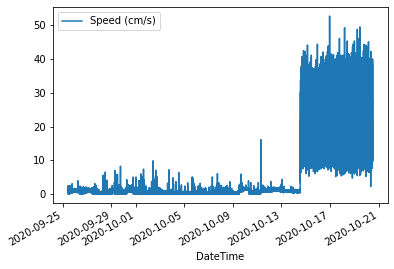

In [9]:
#option 2 - subset without datetime as index
datas = data[(data['DateTime'] > '2020-09-25 11:00:00') & (data['DateTime'] < '2020-10-20 12:00:00')]
datas.plot(x = 'DateTime',y='Speed (cm/s)')

In [10]:
#same outcome - 2 different methods.

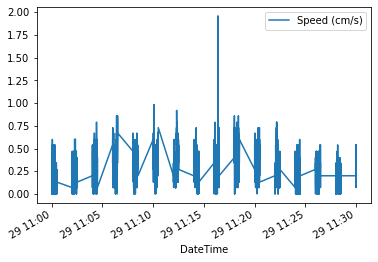

In [11]:
#now let's average over each burst - first let's get a smaller subset to more easily 
#understand what is happening in our data

ds = data2s['2020-09-29 11:00:00':'2020-09-29 11:30:00']
ds.plot(y='Speed (cm/s)')
#ok so now what do we see in the data?

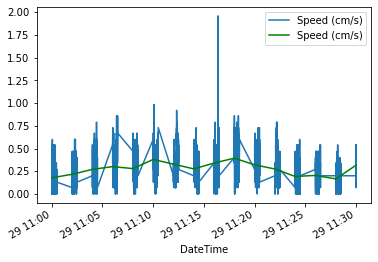

In [12]:
#let's use resample to make this much easier! - we made burst measurements remember
ds_ave = ds.resample('30S').mean().dropna()
ax1 = ds.plot(y='Speed (cm/s)')
ds_ave.plot(y='Speed (cm/s)',color='green',ax = ax1,marker='square')

In [13]:
#now sometimes it is HELPFUL to have the index as datetime, othertimes it's helpful for this to be a column instead
#eg try and plot the above ds (unaveraged) as a SCATTER plot instead of a line plot

#so convert the index back to datetime
#ds.reset_index().head()
ds = ds.reset_index()
ds_ave = ds_ave.reset_index()

In [14]:
ds.head()

,DateTime,ISO 8601 Time,Speed (cm/s),Bearing (degrees),Velocity-N (cm/s),Velocity-E (cm/s)
0,2020-09-29 11:00:00.000,2020-09-29T11:00:00.000,0.07,154.93,-0.06,0.03
1,2020-09-29 11:00:00.063,2020-09-29T11:00:00.063,0.20,154.72,-0.18,0.09
2,2020-09-29 11:00:00.125,2020-09-29T11:00:00.125,0.07,77.54,0.01,0.07
3,2020-09-29 11:00:00.188,2020-09-29T11:00:00.188,0.13,50.23,0.09,0.10
4,2020-09-29 11:00:00.250,2020-09-29T11:00:00.250,0.13,175.05,-0.13,0.01


In [15]:
#ok now let's apply this burst averaging to ALL the data
data_ave = data2s.resample('30S').mean().dropna()

In [16]:
data_ave
#why did I have dropna? what happens without that? Over what other resampling time period could I have averaged?

,Speed (cm/s),Bearing (degrees),Velocity-N (cm/s),Velocity-E (cm/s)
DateTime,,,,
2020-09-25 11:00:00,1.405375,246.648833,-0.479187,-1.256083
2020-09-25 11:02:00,1.279458,244.716500,-0.535396,-1.152708
2020-09-25 11:04:00,0.988313,227.000813,-0.664667,-0.723604
2020-09-25 11:06:00,0.971188,218.808875,-0.741000,-0.607875
2020-09-25 11:08:00,1.016729,224.067500,-0.715812,-0.711771
...,...,...,...,...
2020-10-20 11:52:00,16.163417,248.161229,-4.728979,-14.950562
2020-10-20 11:54:00,22.691271,244.638354,-9.531104,-20.063750
2020-10-20 11:56:00,19.009667,244.889833,-7.830896,-17.098479


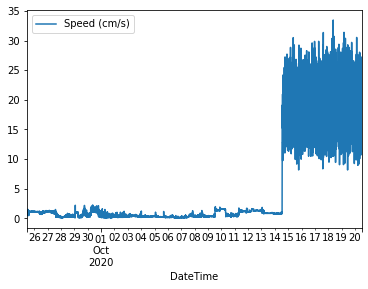

In [17]:
#now let's visualize the dataset again cleaned up
data_ave = data_ave.reset_index()
data_ave.plot(x='DateTime',y='Speed (cm/s)')

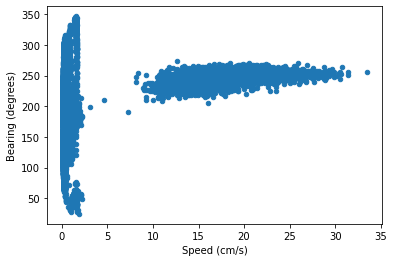

In [18]:
#so now what do we see? What can we change or investigate? What other things can we plot?
data_ave.plot(x='Speed (cm/s)',y='Bearing (degrees)',kind='scatter')

In [19]:
#what is the above plot? What might this tell us? Are they ways we can make this plot more useful? 
#what is one downside to plotting bearing as a linear increasing value?

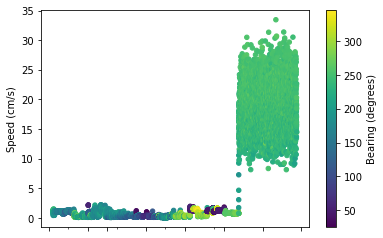

In [20]:
#how else can we analyze the flow magnitude AND DIRECTION?
#option 1 - scatter plot with color highlighting changes in magnitude
data_ave.plot(x='DateTime',y='Speed (cm/s)',kind='scatter',c='Bearing (degrees)',cmap='viridis')

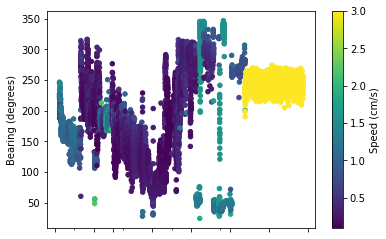

In [21]:
#option 2, look at how bearing changes with time
data_ave.plot(x='DateTime',y='Bearing (degrees)',kind='scatter',c='Speed (cm/s)',cmap='viridis',vmax=3)

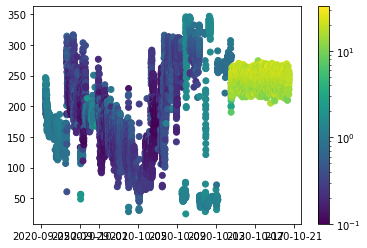

In [25]:
#log scale colormap
import matplotlib.colors as colors

#data_ave.plot(x='DateTime',y='Bearing (degrees)',kind='scatter',c='Speed (cm/s)',cmap='viridis')
fig, ax = plt.subplots()
aa = ax.scatter(data_ave.DateTime,data_ave['Bearing (degrees)'],c=data_ave['Speed (cm/s)'],\
                norm=colors.LogNorm(vmin=.1,vmax=33))
fig.colorbar(aa, ax=ax)

In [ ]:
#option 3 --> rose plots
# https://windrose.readthedocs.io/en/latest/usage.html
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

#now what is our direction? and what is our speed?
#2 methods:
ax = WindroseAxes.from_ax()
ax.bar(data_ave['Bearing (degrees)'], data_ave['Speed (cm/s)'], \
       normed=True, opening=0.9, edgecolor='white')
ax.set_legend()

In [ ]:
#or using pandas data frames more innately
#Mandatory:
#df: Pandas DataFrame with DateTimeIndex as index and at least 2 columns ('speed' and 'direction').
from windrose import plot_windrose

d_ave = data_ave.set_index('DateTime')
#d_ave['speed'] = d_ave['Speed (cm/s)']
#d_ave['direction'] = d_ave['Bearing (degrees)']
plot_windrose(d_ave,var_name='Speed (cm/s)',direction_name = 'Bearing (degrees)',kind='bar',normed=True, \
             bins = np.arange(0,4,.5))
#what do we now see as trends?

In [ ]:
#what's the rest of the data we have?

In [26]:
# read in temp. data
temp = pd.read_csv('Log2_GMS_Oct_(0)_T.txt',header=0)
temp

,ISO 8601 Time,Temperature (C)
0,2020-09-25T10:00:00.000,21.4764
1,2020-09-25T10:02:00.000,21.6657
2,2020-09-25T10:04:00.000,21.8619
3,2020-09-25T10:06:00.000,22.0528
4,2020-09-25T10:08:00.000,22.2617
...,...,...
18714,2020-10-21T09:48:00.000,19.6377
18715,2020-10-21T09:50:00.000,19.6514
18716,2020-10-21T09:52:00.000,19.6678
18717,2020-10-21T09:54:00.000,19.6842


In [27]:
temp['DateTime'] = pd.to_datetime(temp['ISO 8601 Time'])

In [28]:
temp = temp.set_index('DateTime')

In [29]:
temp

,ISO 8601 Time,Temperature (C)
DateTime,,
2020-09-25 10:00:00,2020-09-25T10:00:00.000,21.4764
2020-09-25 10:02:00,2020-09-25T10:02:00.000,21.6657
2020-09-25 10:04:00,2020-09-25T10:04:00.000,21.8619
2020-09-25 10:06:00,2020-09-25T10:06:00.000,22.0528
2020-09-25 10:08:00,2020-09-25T10:08:00.000,22.2617
...,...,...
2020-10-21 09:48:00,2020-10-21T09:48:00.000,19.6377
2020-10-21 09:50:00,2020-10-21T09:50:00.000,19.6514
2020-10-21 09:52:00,2020-10-21T09:52:00.000,19.6678


In [30]:
temps = temp['2020-09-25 11:00:00':'2020-10-20 12:00:00']
temps

,ISO 8601 Time,Temperature (C)
DateTime,,
2020-09-25 11:00:00,2020-09-25T11:00:00.000,13.1663
2020-09-25 11:02:00,2020-09-25T11:02:00.000,12.7130
2020-09-25 11:04:00,2020-09-25T11:04:00.000,12.4460
2020-09-25 11:06:00,2020-09-25T11:06:00.000,12.2892
2020-09-25 11:08:00,2020-09-25T11:08:00.000,12.1995
...,...,...
2020-10-20 11:52:00,2020-10-20T11:52:00.000,11.6982
2020-10-20 11:54:00,2020-10-20T11:54:00.000,11.7010
2020-10-20 11:56:00,2020-10-20T11:56:00.000,11.7038


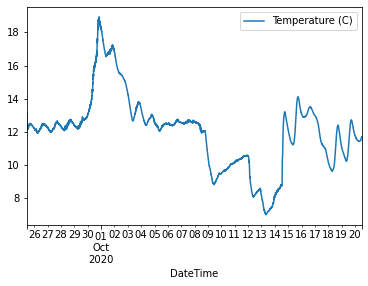

In [31]:
temps.plot(y='Temperature (C)')

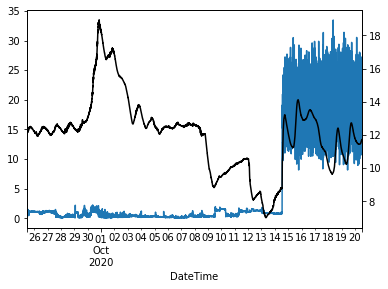

In [32]:
#now let's plot everything together
#f = plt.figure()
ax1 = data_ave.plot(x='DateTime',y='Speed (cm/s)',legend=False)
temps = temps.reset_index()
ax2 = ax1.twinx()
temps.plot(secondary_y=True,x='DateTime',y='Temperature (C)',ax=ax2,color='black',legend=False)

Text(0, 0.5, 'Temperature (C)')

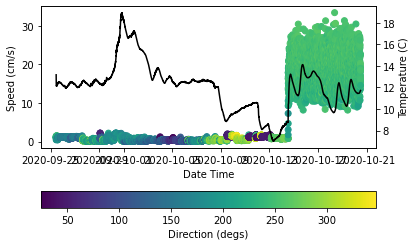

In [33]:
#plt.subplots()
#ax1 = data_ave.plot(x='DateTime',y='Speed (cm/s)',legend=False,kind='scatter',\
 #                   c='Bearing (degrees)',cmap='viridis',colorbar=False)#,ax=ax1)
fig, ax1 = plt.subplots()

plt.scatter(data_ave.DateTime,data_ave['Speed (cm/s)'],c = data_ave['Bearing (degrees)'],cmap='viridis')
plt.colorbar(orientation='horizontal',label='Direction (degs)', pad = 0.2)
ax2 = ax1.twinx()
ax2.plot(temps.DateTime,temps['Temperature (C)'],color='black')

ax1.set_ylabel('Speed (cm/s)')
ax1.set_xlabel('Date Time')
ax2.set_ylabel('Temperature (C)')


In [34]:
#now do this analyses for all sites, and start to pull out the pieces of the data that might be most interesting to look at

In [35]:
#start thinking about how you can calculate the bed shear stress from the above dataset.
#how might these data correlate with precipitation events or other events
#are there trends in the data? Over time? how can you analyze these trends?
#what peaks exist in your data?

In [36]:
weather = pd.read_csv('WeatherData_Norridgewock.txt',header=1,parse_dates=['Date'],\
                     date_parser=lambda x: pd.datetime.strptime(x, '%d-%b').replace(year=2020))
#ahh now what new thing was done here? 

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [37]:
weather.dtypes

Date                datetime64[ns]
Temp Max (øF)                int64
Temp Avg (øF)              float64
Temp Min (øF)                int64
Dew Pt Max                   int64
Dew Point Avg              float64
Dew Point Min                int64
Humidity (%) max             int64
Humidity avg               float64
humidity min                 int64
wind max (mph)               int64
wind avg (mph)             float64
wind min (mph)               int64
press max (hg)             float64
press ave (hg)             float64
press min (hg)             float64
precip (in)                float64
dtype: object

In [38]:
#let's look at this data!
weather = weather.set_index('Date')
weather

,Temp Max (øF),Temp Avg (øF),Temp Min (øF),Dew Pt Max,Dew Point Avg,Dew Point Min,Humidity (%) max,Humidity avg,humidity min,wind max (mph),wind avg (mph),wind min (mph),press max (hg),press ave (hg),press min (hg),precip (in)
Date,,,,,,,,,,,,,,,,
2020-09-01,71,61.0,52,60,55.7,52,100,84.5,53,16,6.0,0,29.9,29.8,29.8,0.00
2020-09-02,69,62.1,53,64,59.0,53,100,90.1,70,14,7.4,0,29.8,29.6,29.4,0.00
2020-09-03,74,67.2,63,65,62.9,56,100,87.8,53,7,4.7,0,29.5,29.4,29.3,0.15
2020-09-04,79,65.6,58,62,55.4,45,100,75.4,30,12,5.0,0,29.6,29.4,29.3,0.00
2020-09-05,72,63.4,56,52,47.6,41,87,58.6,33,8,5.0,0,29.8,29.7,29.6,0.00
2020-09-06,74,61.5,50,54,50.3,45,100,70.7,35,7,1.5,0,29.8,29.8,29.7,0.00
2020-09-07,75,63.3,54,63,57.2,47,100,83.6,37,17,7.7,0,29.8,29.8,29.7,0.00
2020-09-08,81,67.8,62,65,62.8,61,100,85.8,56,9,5.3,0,29.9,29.8,29.7,0.00
2020-09-09,78,66.4,63,67,63.9,61,100,92.5,64,15,5.0,0,30.0,29.9,29.8,0.00


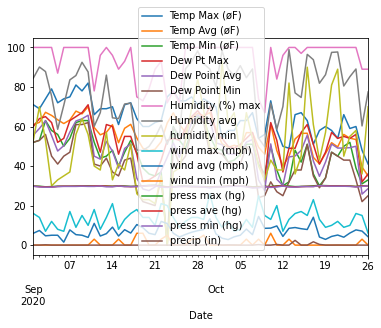

In [39]:
weather.plot()
#what what just happened?

In [40]:
col = weather.columns
print(col)

Index(['Temp Max (øF)', 'Temp Avg (øF)', 'Temp Min (øF)', 'Dew Pt Max',
       'Dew Point Avg', 'Dew Point Min', 'Humidity (%) max', 'Humidity avg',
       'humidity min', 'wind max (mph)', 'wind avg (mph)', 'wind min (mph)',
       'press max (hg)', 'press ave (hg)', 'press min (hg)', 'precip (in)'],
      dtype='object')


In [41]:
wsi = np.append(np.arange(1,14,3),15)
print(wsi)
col[wsi]

[ 1  4  7 10 13 15]


Index(['Temp Avg (øF)', 'Dew Point Avg', 'Humidity avg', 'wind avg (mph)',
       'press ave (hg)', 'precip (in)'],
      dtype='object')

In [42]:
ws = weather[col[wsi]]
ws.head()

,Temp Avg (øF),Dew Point Avg,Humidity avg,wind avg (mph),press ave (hg),precip (in)
Date,,,,,,
2020-09-01,61.0,55.7,84.5,6.0,29.8,0.00
2020-09-02,62.1,59.0,90.1,7.4,29.6,0.00
2020-09-03,67.2,62.9,87.8,4.7,29.4,0.15
2020-09-04,65.6,55.4,75.4,5.0,29.4,0.00
2020-09-05,63.4,47.6,58.6,5.0,29.7,0.00


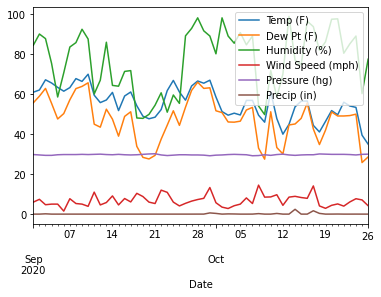

In [43]:
ws.columns = ['Temp (F)', 'Dew Pt (F)','Humidity (%)', 'Wind Speed (mph)','Pressure (hg)','Precip (in)']
ws.plot()
#is this useful?

In [44]:
ws['Temp (C)'] = (ws['Temp (F)']-32)*(5/9)

ws['Precip (cm)'] = ws['Precip (in)']*2.54
ws['Wind Speed (cm/s)'] = ws['Wind Speed (mph)'] * 44.704

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [45]:
#print(ws)
#let's just look at our relevant data
#ws = ws.set_index('Date')
ws = ws['2020-09-25':'2020-10-20']

        Date  Temp (F)  Dew Pt (F)  Humidity (%)  Wind Speed (mph)  \
0 2020-09-25      61.1        44.4          55.4               4.1   
1 2020-09-26      57.0        53.5          89.2               5.4   
2 2020-09-27      64.1        61.9          92.9               6.5   
3 2020-09-28      66.6        66.0          98.2               7.3   
4 2020-09-29      65.5        62.9          91.7               7.9   

   Pressure (hg)  Precip (in)   Temp (C)  Precip (cm)  Wind Speed (cm/s)  
0           29.7         0.00  16.166667       0.0000           183.2864  
1           29.7         0.00  13.888889       0.0000           241.4016  
2           29.6         0.00  17.833333       0.0000           290.5760  
3           29.6         0.01  19.222222       0.0254           326.3392  
4           29.5         0.01  18.611111       0.0254           353.1616  


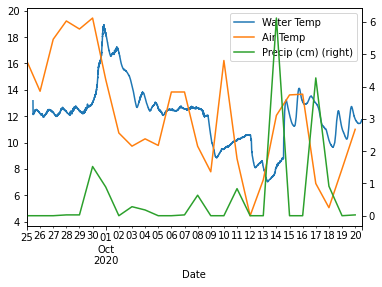

In [52]:
print(ws.head())
#lets see how this looks with our data
ax1 = temps.plot(x='DateTime',y='Temperature (C)',label='Water Temp')
#ws = ws.reset_index()
ws.plot(x='Date',y='Temp (C)',ax=ax1,label='Air Temp')
ws.plot(x='Date',y='Precip (cm)',secondary_y=True,ax=ax1)

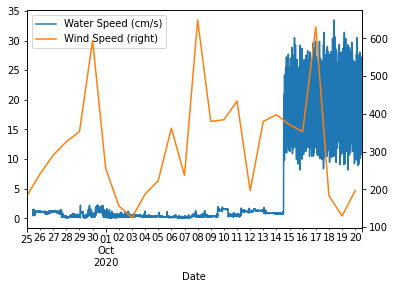

In [49]:
#what else can we look at?
ax1 = data_ave.plot(x='DateTime',y='Speed (cm/s)',label='Water Speed (cm/s)')
ws.plot(x='Date',y='Wind Speed (cm/s)',ax=ax1,secondary_y=True,label='Wind Speed')

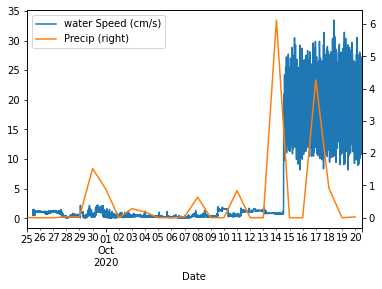

In [50]:
#what else can we look at?
ax1 = data_ave.plot(x='DateTime',y='Speed (cm/s)',label='water Speed (cm/s)')
ws.plot(x='Date',y='Precip (cm)',ax=ax1,secondary_y=True,label='Precip')

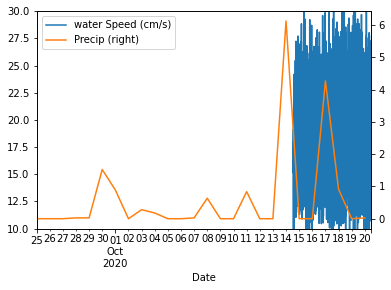

In [53]:
ax1 = data_ave.plot(x='DateTime',y='Speed (cm/s)',label='water Speed (cm/s)')
ax1.set_ylim(10,30)
ws.plot(x='Date',y='Precip (cm)',ax=ax1,secondary_y=True,label='Precip')

In [54]:
data_ave.shape

(18031, 5)

In [64]:
d = data_ave.set_index('DateTime')
dd = d['2020-10-13':'2020-10-21']
wsd = ws.set_index('Date')
wsdd = wsd['2020-10-13':'2020-10-21']
dd = dd.reset_index()
wsdd = wsdd.reset_index()

(15.0, 30.0)

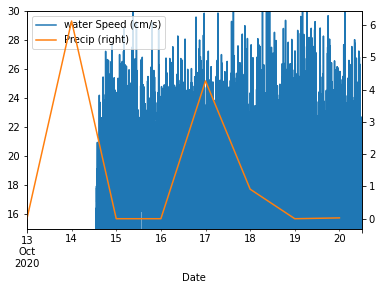

In [65]:
ax1 = dd.plot(x='DateTime',y='Speed (cm/s)',label='water Speed (cm/s)')
wsdd.plot(x='Date',y='Precip (cm)',ax=ax1,secondary_y=True,label='Precip')
ax1.set_ylim(15,30)

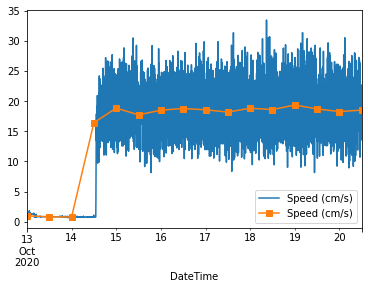

In [79]:
#dd = dd.set_index('DateTime')
ddm = dd.resample('12H').mean()
ax1 = dd.plot(y='Speed (cm/s)')
ddm.plot(y='Speed (cm/s)',style='s-',ax=ax1)
